# What can be represented on a map?

Several types of geographic data :  <br>
• Point <br>
• LineString <br>
• Polygon <br>
• others : LinearRing, MultiPolygon… <br>

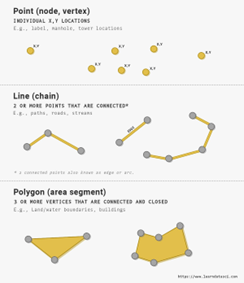 <br>

Several types of maps : <br>
• Points representation <br>
• Choropleth maps <br>

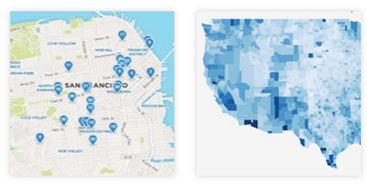

💡Read this article for more information : https://www.learndatasci.com/tutorials/geospatial-data-python-geopandas-shapely/

# Several libraries to analyse geographic data

• Shapely : manipulate and analyse geometric objects <br>
Documentation : https://shapely.readthedocs.io/en/stable/manual.html

• Geopandas : process (read...) geographic data <br>
Documentation : https://geopandas.org/en/v0.4.0/index.html

• Pyproj : manage geographic coordinate system <br>
Documentation : https://pyproj4.github.io/pyproj/stable/index.html

### Installing GeoPandas

To avoid common problems with geopandas installation, create a virtual environment. <br>

Follow : https://medium.com/analytics-vidhya/fastest-way-to-install-geopandas-in-jupyter-notebook-on-windows-8f734e11fa2b <br>
until opening Jupyter. <br>

Reinstall packages not included like plotly.

In [10]:
# Import libraries
!pip install shapely
!pip install geopandas
import pandas as pd
import numpy as np

import matplotlib
import plotly.express as px

import shapely
from shapely.geometry import Point, LineString, Polygon, MultiPolygon

import geopandas as gpd


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 6.0 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.3/23.3 MB 25.8 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 69.7 MB/s eta 0:00:00m eta 0:00:010:01m


# Reading data

Different types of files can contain geographic data : geojson, shapefiles (.shp),... but also CSV or Excel.

In [11]:
#Read French areas data (regions-20140306-100m.shp) with geopandas.read_file


SyntaxError: invalid decimal literal (1300130673.py, line 1)

In [12]:
#regions.head()

In [54]:
#type(regions)

In [55]:
#Read energy production data (installations-production-elec-gaz.csv)


In [56]:
#df_energy_prod.head()

In [57]:
#type(df_energy_prod)

<br>
When we import data with geopandas, Python reads them like geographic data, but for CSV, coordinates are strings. We have to convert the column "coordonnees" to get a geometric object.

In [42]:
# Create a column "geometry" that looks like : 'POINT (latitude longitude)'
def coord_to_point(coord):
    if pd.isna(coord):
        return None
    lon, lat = map(float, coord.split(','))
    return Point(lat, lon)

df_energy_prod['geometry'] = df_energy_prod['coordonnees'].apply(coord_to_point)

In [58]:
df_energy_prod['geometry'].iloc[0]

In [59]:
type(df_energy_prod)

In [29]:
# Convert df_energy_prod to GeoDataFrame
df_energy_prod = gpd.GeoDataFrame(df_energy_prod)

In [60]:
type(df_energy_prod)

# Visualising data statically

With .plot(), we can view maps statically :

<Axes: >

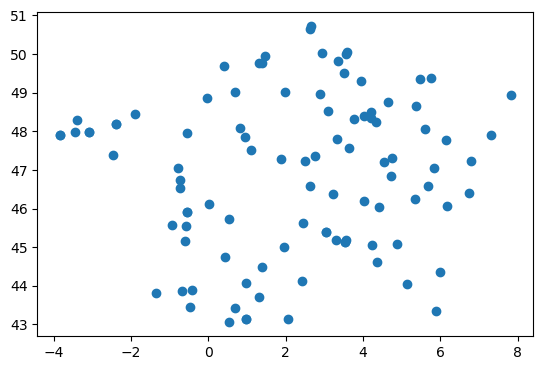

In [43]:
# Visualise df_energy_prod 
df_energy_prod.iloc[0:100].plot()

In [35]:
#Visualise regions


# Visualising maps interactively

We'll use Plotly Express functions, one for points and one for polygons

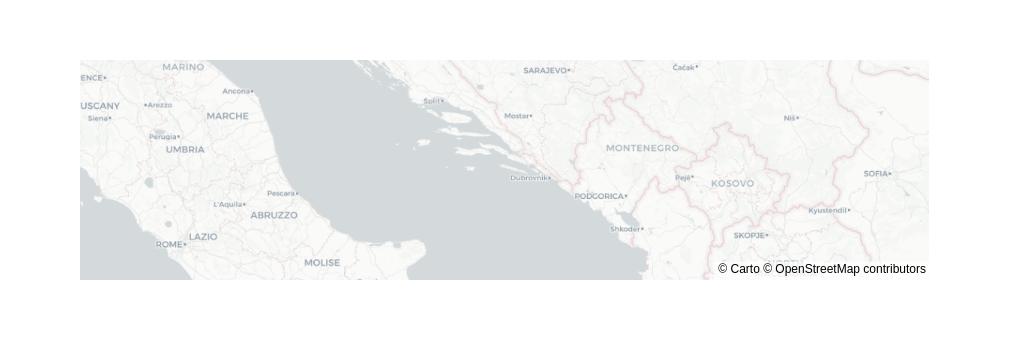

In [47]:
# First 1000 points
fig = px.scatter_mapbox(df_energy_prod.iloc[0:1000],
                        lat=df_energy_prod['geometry'].iloc[0:1000].y, lon=df_energy_prod['geometry'].iloc[0:1000].x, 
                        mapbox_style="carto-positron", #fond de carte
                        zoom=6, center = {"lat": 46, "lon": 4}) #positionnement par défaut de la carte
                        
fig.show()

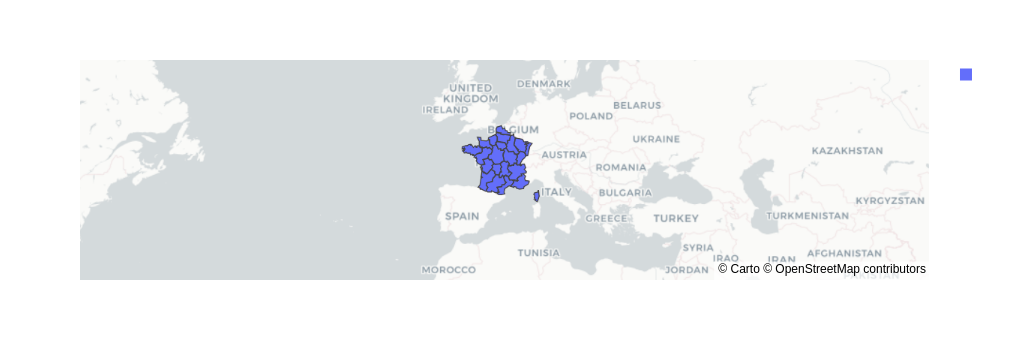

In [52]:
fig = px.choropleth_mapbox(regions, geojson = regions["geometry"],
                          locations = regions.index,
                          mapbox_style="carto-positron",
                          zoom=3, center = {"lat": 47, "lon": 4})
fig.show()

💡 Several libraries can be used to create maps : <br>
Interactive: Plotly, Folium, Mplleaflet… <br>
Static: Basemap, Cartopy… <br>

You can compare on : https://github.com/ispmarin/maps and with the libraries documentation.

# Bonus

With Plotly documentation (https://plotly.com/python/maps/), improve the maps : 
- color the points according to the energy source
- change mapbox style
- customise the hovertemplate
- ...